In [1]:
import os
import pandas as pd


In [8]:
data_folder = '/data/home/natant/Negatives/Data/Encode690/filtered_hg38' # converted from hg19 to hg38

In [2]:
# Define the path to your metadata file
metadata_file = "/data/home/natant/Negatives/Data/Encode690/wgEncodeAwgTfbsUniform/files.txt"

# Initialize a list to store parsed metadata
data = []

# Read the file line by line
with open(metadata_file, "r") as file:
    for line in file:
        # Split the filename from the metadata
        filename, metadata = line.split(".gz")
        filename += ".gz"
        
        # Split metadata into key-value pairs
        metadata_dict = dict(
            item.split("=") for item in metadata.strip().split("; ") if "=" in item
        )
        
        # Add the filename to the metadata
        metadata_dict["filename"] = filename
        
        # Append to the list
        data.append(metadata_dict)

# Create a DataFrame from the parsed data
df = pd.DataFrame(data)

# Display the DataFrame
df


,project,lab,composite,dataType,view,cell,treatment,antibody,control,dataVersion,dccAccession,controlId,quality,tableName,type,md5sum,size,filename
0,wgEncode,Broad,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,Dnd41,None,CTCF,std,ENCODE Mar 2012 Freeze,wgEncodeEH002402,wgEncodeEH002434,good,wgEncodeAwgTfbsBroadDnd41CtcfUniPk,narrowPeak,d24dcb9899cf3f58dfb83e8701b9e9cc,966K,wgEncodeAwgTfbsBroadDnd41CtcfUniPk.narrowPeak.gz
1,wgEncode,Broad,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,Dnd41,None,EZH2_(39875),std,ENCODE Mar 2012 Freeze,wgEncodeEH003080,wgEncodeEH002434,caution,wgEncodeAwgTfbsBroadDnd41Ezh239875UniPk,narrowPeak,effd48196e39d321ad9f4e2c857dbe88,43K,wgEncodeAwgTfbsBroadDnd41Ezh239875UniPk.narrow...
2,wgEncode,Broad,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,GM12878,None,CTCF,std,ENCODE Mar 2012 Freeze,wgEncodeEH000029,wgEncodeEH000037,good,wgEncodeAwgTfbsBroadGm12878CtcfUniPk,narrowPeak,fef0af7fe1e724159e665085da53efb1,982K,wgEncodeAwgTfbsBroadGm12878CtcfUniPk.narrowPea...
3,wgEncode,Broad,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,GM12878,None,EZH2_(39875),std,ENCODE Mar 2012 Freeze,wgEncodeEH002411,wgEncodeEH000037,good,wgEncodeAwgTfbsBroadGm12878Ezh239875UniPk,narrowPeak,9a87661953cb6419847abd00599f0a30,66K,wgEncodeAwgTfbsBroadGm12878Ezh239875UniPk.narr...
4,wgEncode,Broad,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,H1-hESC,None,CHD1_(A301-218A),std,ENCODE Mar 2012 Freeze,wgEncodeEH002095,wgEncodeEH000088,good,wgEncodeAwgTfbsBroadH1hescChd1a301218aUniPk,narrowPeak,71891a536ed23a626f37d0c9b64ff2b1,184K,wgEncodeAwgTfbsBroadH1hescChd1a301218aUniPk.na...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,wgEncode,UW,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,RPTEC,None,CTCF,std,ENCODE Mar 2012 Freeze,wgEncodeEH002059,wgEncodeEH002045,good,wgEncodeAwgTfbsUwRptecCtcfUniPk,narrowPeak,7a9903087a7adaa6b4ff05d71b965e8c,1.2M,wgEncodeAwgTfbsUwRptecCtcfUniPk.narrowPeak.gz
686,wgEncode,UW,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,SAEC,None,CTCF,std,ENCODE Mar 2012 Freeze,wgEncodeEH000437,wgEncodeEH000473,good,wgEncodeAwgTfbsUwSaecCtcfUniPk,narrowPeak,e9c1ec8cbb9e1b6c17d2472464fb226b,818K,wgEncodeAwgTfbsUwSaecCtcfUniPk.narrowPeak.gz
687,wgEncode,UW,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,SK-N-SH_RA,None,CTCF,std,ENCODE Mar 2012 Freeze,wgEncodeEH000439,wgEncodeEH000474,good,wgEncodeAwgTfbsUwSknshraCtcfUniPk,narrowPeak,e5acc7a6dbbf1d625787c5072ad1c493,1015K,wgEncodeAwgTfbsUwSknshraCtcfUniPk.narrowPeak.gz
688,wgEncode,UW,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,WERI-Rb-1,None,CTCF,std,ENCODE Mar 2012 Freeze,wgEncodeEH000402,wgEncodeEH000475,good,wgEncodeAwgTfbsUwWerirb1CtcfUniPk,narrowPeak,f2276e90f483cbd6f64305c6df481324,941K,wgEncodeAwgTfbsUwWerirb1CtcfUniPk.narrowPeak.gz


In [3]:
maxatac_info = pd.read_csv('/data/home/natant/Negatives/Data/maxATAC/maxatac_chip.csv', sep='\t')
maxatac_info = maxatac_info[maxatac_info["src"] == "ENCODE"]
maxatac_info

,id,geo,src,tf,cell
0,ENCFF737RQV,GSE96480,ENCODE,MBD2,MCF-7
1,ENCFF092MMG,GSE96461,ENCODE,CREM,HepG2
2,ENCFF185LJE,GSE96455,ENCODE,JUNB,GM12878
3,ENCFF254BDZ,GSE96441,ENCODE,ZHX2,MCF-7
4,ENCFF401GJM,GSE96429,ENCODE,TCF7,K562
...,...,...,...,...,...
366,ENCFF762CTH,GSM1003605,ENCODE,ESRRA,GM12878
367,ENCFF781JQX,GSM1003604,ENCODE,CUX1,GM12878
368,ENCFF272RZS,GSM1003603,ENCODE,SREBF2,GM12878
369,ENCFF990JXT,GSM1003602,ENCODE,ZNF384,GM12878


In [4]:
# Function to extract text before the first underscore, remove "-", and make it lowercase
def extract_tf_name(tf):
    return tf.split('_')[0].replace('-', '').lower()

# Apply the function to both maxatac_info and df
maxatac_info["tf_base"] = maxatac_info["tf"].apply(extract_tf_name)
df["antibody_base"] = df["antibody"].apply(extract_tf_name)

# Get unique base TFs from maxatac_info and df
maxatac_tfs_base = set(maxatac_info["tf_base"].unique())
df_tfs_base = set(df["antibody_base"].unique())

# Find common base TFs
common_tfs_base = maxatac_tfs_base.intersection(df_tfs_base)

# Find unique base TFs in maxatac_info
unique_maxatac_tfs_base = maxatac_tfs_base - df_tfs_base

# Find unique base TFs in df
unique_df_tfs_base = df_tfs_base - maxatac_tfs_base

# Print the results
print(f"Number of common base TFs: {len(common_tfs_base)}")
print(f"Number of unique base TFs in maxatac_info: {len(unique_maxatac_tfs_base)}")
print(f"Number of unique base TFs in df: {len(unique_df_tfs_base)}")

# Optionally, print the unique base TFs
print(f"Unique base TFs in maxatac_info: {unique_maxatac_tfs_base}")
print(f"Unique base TFs in df: {unique_df_tfs_base}")

# Create a list to store the matched TFs
matched_tfs_list = []
for tf_base in common_tfs_base:
    maxatac_tf = maxatac_info[maxatac_info["tf_base"] == tf_base]["tf"].values[0]
    df_tf = df[df["antibody_base"] == tf_base]["antibody"].values[0]
    matched_tfs_list.append({"maxatac_tf": maxatac_tf, "df_tf": df_tf})

# Convert the list to a DataFrame
matched_tfs = pd.DataFrame(matched_tfs_list)

# Display the matched TFs
print(matched_tfs)

Number of common base TFs: 58
Number of unique base TFs in maxatac_info: 63
Number of unique base TFs in df: 112
Unique base TFs in maxatac_info: {'runx1', 'crem', 'neurod1', 'nkrf', 'foxp1', 'zfx', 'klf5', 'zbtb11', 'nfe2l2', 'pax8', 'zscan29', 'rest', 'fos', 'srebf1', 'gabpa', 'elf4', 'mnt', 'smad1', 'lef1', 'ybx1', 'znf282', 'pknox1', 'mbd2', 'znf407', 'zhx2', 'atf7', 'e2f8', 'nr2f6', 'znf384', 'znf207', 'hes1', 'znf687', 'foxk2', 'gata4', 'myb', 'etv6', 'myc', 'tcf7', 'smad5', 'nr2c1', 'junb', 'e4f1', 'znf24', 'nfxl1', 'skil', 'zbed1', 'cbx2', 'jun', 'esrra', 'gatad2b', 'znf592', 'cebpz', 'arnt', 'zbtb40', 'nr2f1', 'sox6', 'rfx1', 'srebf2', 'ash1l', 'cux1', 'nfatc3', 'spi1', 'nr2c2'}
Unique base TFs in df: {'egfpjunb', 'erra', 'egfpfos', 'baf155', 'e2f4', 'znf263', 'tcf3', 'mta3', 'sin3ak20', 'tfiiic110', 'p300', 'gtf2f1', 'sirt6', 'bcl3', 'brf2', 'sp2', 'hdac2', 'whip', 'sap30', 'ini1', 'ap2gamma', 'brg1', 'mef2c', 'elk4', 'nelfe', 'nfyb', 'phf8', 'sin3a', 'gtf2b', 'ubf', 'brf1', 

In [5]:
# Function to normalize cell type names by making them lowercase and removing "-"
def normalize_cell_name(cell):
    return cell.replace('-', '').lower()

# Apply the function to both maxatac_info and df
maxatac_info["cell_base"] = maxatac_info["cell"].apply(normalize_cell_name)
df["cell_base"] = df["cell"].apply(normalize_cell_name)

# Get unique normalized cell types from maxatac_info and df
maxatac_cells_base = set(maxatac_info["cell_base"].unique())
df_cells_base = set(df["cell_base"].unique())

# Find common normalized cell types
common_cells_base = maxatac_cells_base.intersection(df_cells_base)

# Find unique normalized cell types in maxatac_info
unique_maxatac_cells_base = maxatac_cells_base - df_cells_base

# Find unique normalized cell types in df
unique_df_cells_base = df_cells_base - maxatac_cells_base

# Print the results
print(f"Number of common cell types: {len(common_cells_base)}")
print(f"Number of unique cell types in maxatac_info: {len(unique_maxatac_cells_base)}")
print(f"Number of unique cell types in df: {len(unique_df_cells_base)}")

# Optionally, print the unique cell types
print(f"Unique cell types in maxatac_info: {unique_maxatac_cells_base}")
print(f"Unique cell types in df: {unique_df_cells_base}")
# Create a list to store the matched cell types
matched_cells_list = []
for cell_base in common_cells_base:
    maxatac_cell = maxatac_info[maxatac_info["cell_base"] == cell_base]["cell"].values[0]
    df_cell = df[df["cell_base"] == cell_base]["cell"].values[0]
    matched_cells_list.append({"maxatac_cell": maxatac_cell, "df_cell": df_cell})

# Convert the list to a DataFrame
matched_cells = pd.DataFrame(matched_cells_list)

# Display the matched cell types
print(matched_cells)

# Get the original names of the unmatched cell types in maxatac_info
unmatched_maxatac_cells = maxatac_info[maxatac_info["cell_base"].isin(unique_maxatac_cells_base)]["cell"].unique()

# Get the original names of the unmatched cell types in df
unmatched_df_cells = df[df["cell_base"].isin(unique_df_cells_base)]["cell"].unique()

# Print the results
print(f"Unmatched cell types in maxatac_info: {unmatched_maxatac_cells}")
print(f"Unmatched cell types in df: {unmatched_df_cells}")

Number of common cell types: 10
Number of unique cell types in maxatac_info: 4
Number of unique cell types in df: 81
Unique cell types in maxatac_info: {'pc3', 'gm23338', 'wa09', 'hek293t'}
Unique cell types in df: {'gm15510', 'aoaf', 'gm12872', 'ag09319', 'hpaf', 'mcf10aersrc', 'ag10803', 'ag09309', 'gm19239', 'hcfaa', 'gm12874', 'nhdfneo', 't47d', 'shsy5y', 'gliobla', 'gm12801', 'hre', 'gm12891', 'nha', 'gm12865', 'pbdefetal', 'hbmec', 'gm19240', 'nb4', 'hsmmtube', 'gm12873', 'hasp', 'gm19238', 'hpf', 'gm18505', 'hrpepic', 'hl60', 'gm18951', 'huvec', 'h1hesc', 'rptec', 'raji', 'heepic', 'nt2d1', 'gm18526', 'nhdfad', 'osteobl', 'hffmyc', 'gm10847', 'hcm', 'hcpepic', 'progfib', 'nhlf', 'u2os', 'ecc1', 'be2_c', 'wi38', 'hmf', 'ag04449', 'bj', 'gm12892', 'werirb1', 'caco2', 'dnd41', 'ag04450', 'hsmm', 'gm19099', 'helas3', 'hff', 'saec', 'hac', 'fibrobl', 'hvmf', 'pbde', 'sknmc', 'gm06990', 'gm19193', 'gm08714', 'hmec', 'nhek', 'hek293trex', 'pfsk1', 'gm12875', 'u87', 'gm12864', 'sknsh_ra

In [6]:
# Filter df to include only matched cells
matched_cells_set = set(matched_cells["df_cell"])
df_filtered_cells = df[df["cell"].isin(matched_cells_set)]

# Filter df_filtered_cells to include only matched TFs
matched_tfs_set = set(matched_tfs["df_tf"])
df_filtered = df_filtered_cells[df_filtered_cells["antibody"].isin(matched_tfs_set)]

# Display the filtered dataframe
df_filtered
# Add columns for corresponding celltype and tf name in the maxatac dataset
df_filtered = df_filtered.merge(matched_cells, left_on='cell', right_on='df_cell', how='left')
df_filtered = df_filtered.merge(matched_tfs, left_on='antibody', right_on='df_tf', how='left')

# Display the filtered dataframe with new columns
df_filtered

,project,lab,composite,dataType,view,cell,treatment,antibody,control,dataVersion,...,type,md5sum,size,filename,antibody_base,cell_base,maxatac_cell,df_cell,maxatac_tf,df_tf
0,wgEncode,Broad,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,GM12878,None,CTCF,std,ENCODE Mar 2012 Freeze,...,narrowPeak,fef0af7fe1e724159e665085da53efb1,982K,wgEncodeAwgTfbsBroadGm12878CtcfUniPk.narrowPea...,ctcf,gm12878,GM12878,GM12878,CTCF,CTCF
1,wgEncode,Broad,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,HepG2,None,CTCF,std,ENCODE Mar 2012 Freeze,...,narrowPeak,6f8ab32864e515e0362494a3a8df2b8e,892K,wgEncodeAwgTfbsBroadHepg2CtcfUniPk.narrowPeak.gz,ctcf,hepg2,HepG2,HepG2,CTCF,CTCF
2,wgEncode,Broad,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,K562,None,CTCF,std,ENCODE Mar 2012 Freeze,...,narrowPeak,919d1986bad2d03b4beb4a40a12f5bb2,1.2M,wgEncodeAwgTfbsBroadK562CtcfUniPk.narrowPeak.gz,ctcf,k562,K562,K562,CTCF,CTCF
3,wgEncode,HudsonAlpha,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,A549,EtOH_0.02pct,ATF3,NaN,ENCODE Mar 2012 Freeze,...,narrowPeak,04b555c96fac6ff5cd3ade02be4c9b66,168K,wgEncodeAwgTfbsHaibA549Atf3V0422111Etoh02UniPk...,atf3,a549,A549,A549,ATF3,ATF3
4,wgEncode,HudsonAlpha,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,A549,DEX_100nM,CREB1_(SC-240),NaN,ENCODE Mar 2012 Freeze,...,narrowPeak,4e04e30603901f81c80fb99c0394d11f,378K,wgEncodeAwgTfbsHaibA549Creb1sc240V0416102Dex10...,creb1,a549,A549,A549,CREB1,CREB1_(SC-240)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,wgEncode,UW,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,HCT-116,None,CTCF,std,ENCODE Mar 2012 Freeze,...,narrowPeak,5353919b8dec58898d42391ed013ed3b,1006K,wgEncodeAwgTfbsUwHct116CtcfUniPk.narrowPeak.gz,ctcf,hct116,HCT116,HCT-116,CTCF,CTCF
143,wgEncode,UW,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,HEK293,None,CTCF,std,ENCODE Mar 2012 Freeze,...,narrowPeak,85054a5025553ab029c7eb16c94dcbc4,1.1M,wgEncodeAwgTfbsUwHek293CtcfUniPk.narrowPeak.gz,ctcf,hek293,HEK293,HEK293,CTCF,CTCF
144,wgEncode,UW,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,HepG2,None,CTCF,std,ENCODE Mar 2012 Freeze,...,narrowPeak,3fdf2bfeeb9bf469510d615efec560ae,905K,wgEncodeAwgTfbsUwHepg2CtcfUniPk.narrowPeak.gz,ctcf,hepg2,HepG2,HepG2,CTCF,CTCF
145,wgEncode,UW,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,K562,None,CTCF,std,ENCODE Mar 2012 Freeze,...,narrowPeak,365af2fdea48c046dafad14b73f69b5d,850K,wgEncodeAwgTfbsUwK562CtcfUniPk.narrowPeak.gz,ctcf,k562,K562,K562,CTCF,CTCF


In [9]:
# Define the path to save the CSV file
csv_file_path = os.path.join(data_folder, "metadata.csv")

# Write the dataframe to a CSV file
#df_filtered.to_csv(csv_file_path, index=False)

In [33]:
# 147 tf-celltype combos from 371 encode based ones in maxatac

In [10]:
len(df_filtered.antibody.value_counts()) # ONLY 55 TFs in the end!!! from 127 in maxATAC (in total not only ENCODE)

55

In [11]:
# Filter df to include only matched cells
matched_cells_set = set(matched_cells["df_cell"])
df_filtered_cells_only = df[df["cell"].isin(matched_cells_set)]

# Display the filtered dataframe
df_filtered_cells_only

,project,lab,composite,dataType,view,cell,treatment,antibody,control,dataVersion,dccAccession,controlId,quality,tableName,type,md5sum,size,filename,antibody_base,cell_base
2,wgEncode,Broad,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,GM12878,None,CTCF,std,ENCODE Mar 2012 Freeze,wgEncodeEH000029,wgEncodeEH000037,good,wgEncodeAwgTfbsBroadGm12878CtcfUniPk,narrowPeak,fef0af7fe1e724159e665085da53efb1,982K,wgEncodeAwgTfbsBroadGm12878CtcfUniPk.narrowPea...,ctcf,gm12878
3,wgEncode,Broad,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,GM12878,None,EZH2_(39875),std,ENCODE Mar 2012 Freeze,wgEncodeEH002411,wgEncodeEH000037,good,wgEncodeAwgTfbsBroadGm12878Ezh239875UniPk,narrowPeak,9a87661953cb6419847abd00599f0a30,66K,wgEncodeAwgTfbsBroadGm12878Ezh239875UniPk.narr...,ezh2,gm12878
12,wgEncode,Broad,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,HepG2,None,CTCF,std,ENCODE Mar 2012 Freeze,wgEncodeEH000080,wgEncodeEH000084,good,wgEncodeAwgTfbsBroadHepg2CtcfUniPk,narrowPeak,6f8ab32864e515e0362494a3a8df2b8e,892K,wgEncodeAwgTfbsBroadHepg2CtcfUniPk.narrowPeak.gz,ctcf,hepg2
13,wgEncode,Broad,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,HepG2,None,EZH2_(39875),std,ENCODE Mar 2012 Freeze,wgEncodeEH002416,wgEncodeEH000084,caution,wgEncodeAwgTfbsBroadHepg2Ezh239875UniPk,narrowPeak,5e3ba666537059025883191074765280,85K,wgEncodeAwgTfbsBroadHepg2Ezh239875UniPk.narrow...,ezh2,hepg2
23,wgEncode,Broad,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,K562,None,CHD1_(A301-218A),std,ENCODE Mar 2012 Freeze,wgEncodeEH002088,wgEncodeEH000052,good,wgEncodeAwgTfbsBroadK562Chd1a301218aUniPk,narrowPeak,a16380fc02b67d668afe29a58a2d429f,227K,wgEncodeAwgTfbsBroadK562Chd1a301218aUniPk.narr...,chd1,k562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,wgEncode,UW,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,HCT-116,None,CTCF,std,ENCODE Mar 2012 Freeze,wgEncodeEH002055,wgEncodeEH000950,good,wgEncodeAwgTfbsUwHct116CtcfUniPk,narrowPeak,5353919b8dec58898d42391ed013ed3b,1006K,wgEncodeAwgTfbsUwHct116CtcfUniPk.narrowPeak.gz,ctcf,hct116
665,wgEncode,UW,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,HEK293,None,CTCF,std,ENCODE Mar 2012 Freeze,wgEncodeEH000396,wgEncodeEH000464,good,wgEncodeAwgTfbsUwHek293CtcfUniPk,narrowPeak,85054a5025553ab029c7eb16c94dcbc4,1.1M,wgEncodeAwgTfbsUwHek293CtcfUniPk.narrowPeak.gz,ctcf,hek293
667,wgEncode,UW,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,HepG2,None,CTCF,std,ENCODE Mar 2012 Freeze,wgEncodeEH000401,wgEncodeEH000470,good,wgEncodeAwgTfbsUwHepg2CtcfUniPk,narrowPeak,3fdf2bfeeb9bf469510d615efec560ae,905K,wgEncodeAwgTfbsUwHepg2CtcfUniPk.narrowPeak.gz,ctcf,hepg2
679,wgEncode,UW,wgEncodeAwgTfbsUniform,ChipSeq,Peaks,K562,None,CTCF,std,ENCODE Mar 2012 Freeze,wgEncodeEH000399,wgEncodeEH000471,good,wgEncodeAwgTfbsUwK562CtcfUniPk,narrowPeak,365af2fdea48c046dafad14b73f69b5d,850K,wgEncodeAwgTfbsUwK562CtcfUniPk.narrowPeak.gz,ctcf,k562


In [36]:
# 395 tf-celltype combos compared to 371 encode based ones in maxatac

In [12]:
len(df_filtered_cells_only.antibody.value_counts()) # 171 up from 127 in maxATAC (in total not only ENCODE)

171

In [14]:
import os

import matplotlib.pyplot as plt

# # Create the metrics folder if it doesn't exist
# metrics_folder = os.path.join(data_folder, "metrics")
# os.makedirs(metrics_folder, exist_ok=True)

# # Iterate through each row in the filtered dataframe
# for index, row in df_filtered.iterrows():
#     file_name = row['filename'][:-3]
#     file_path = os.path.join(data_folder, file_name)
    
#     # Read the peaks data
#     peaks = pd.read_csv(file_path, sep='\t', header=None)
#     peaks.columns = ['chr', 'start', 'end', 'name', 'score', 'strand', "signalValue", "pValue", "qValue", "peak"]
    
#     # Calculate the delta
#     peaks["delta"] = peaks["end"] - peaks["start"]
    
#     # Generate the histogram
#     plt.figure()
#     peaks["delta"].hist(bins=50)
#     plt.title(f"Histogram of delta for {file_name}")
#     plt.xlabel("Delta")
#     plt.ylabel("Frequency")
    
#     # Save the histogram
#     histogram_path = os.path.join(metrics_folder, f"{file_name}_histogram.png")
#     plt.savefig(histogram_path)
#     plt.close()

In [15]:
# Initialize a list to store the number of peaks for each dataset
num_peaks_list = []

# Iterate through each row in the filtered dataframe
for index, row in df_filtered.iterrows():
    file_name = row['filename'][:-3]
    file_path = os.path.join(data_folder, file_name)
    
    # Read the peaks data
    peaks = pd.read_csv(file_path, sep='\t', header=None)
    peaks.columns = ['chr', 'start', 'end', 'name', 'score', 'strand', "signalValue", "pValue", "qValue", "peak"]
    
    # Count the number of peaks
    num_peaks = len(peaks)
    
    # Append the count to the list
    num_peaks_list.append(num_peaks)

# Create a DataFrame from the list
num_peaks_df = pd.DataFrame(num_peaks_list, columns=['num_peaks'])


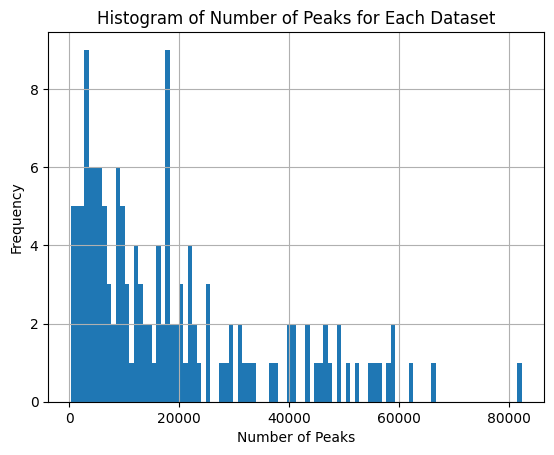

In [16]:

num_peaks_df['num_peaks'].hist(bins=100)
plt.title("Histogram of Number of Peaks for Each Dataset")
plt.xlabel("Number of Peaks")
plt.ylabel("Frequency")

# Display the histogram
plt.show()

In [17]:
num_peaks_df.sort_values(by='num_peaks', ascending=False) # 3 datasets with under 500 peaks! remove?


,num_peaks
139,82332
135,66718
97,62011
146,59145
136,58728
...,...
89,724
94,684
126,306
106,245


In [18]:
peaks["delta"] = peaks["end"] - peaks["start"]

In [19]:
import numpy as np

In [20]:
# Calculate the middle of the peak relative to the start position
peaks["middle"] = (peaks["end"] - peaks["start"]) // 2
peaks["middle delta"] = np.abs((peaks["middle"] - peaks["peak"]))
# Display the updated DataFrame
peaks

,chr,start,end,name,score,strand,signalValue,pValue,qValue,peak,delta,middle,middle delta
0,chr1,150979503,150979805,.,1000,.,582.239309,-1,4.946241,159,302,151,8
1,chr20,58209854,58210163,.,1000,.,570.397860,-1,4.946241,173,309,154,19
2,chr20,48621015,48621337,.,1000,.,559.686319,-1,4.946241,170,322,161,9
3,chr17,57243146,57243445,.,1000,.,556.079248,-1,4.946241,142,299,149,7
4,chr20,48635832,48636163,.,1000,.,541.949956,-1,4.946241,138,331,165,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59140,chr8,105801073,105801349,.,122,.,19.139477,-1,2.819606,138,276,138,0
59141,chrX,154710381,154710657,.,122,.,19.138878,-1,2.819614,138,276,138,0
59142,chr5,25100037,25100313,.,122,.,19.138246,-1,2.819621,138,276,138,0
59143,chr11,133530401,133530677,.,122,.,19.137926,-1,2.819628,138,276,138,0


In [21]:
middle_peak_ratio = sum(peaks["middle delta"]==0)/peaks.shape[0]


In [22]:
# Initialize a list to store the middle peak ratio for each dataset
middle_peak_ratio_list = []

# Iterate through each row in the filtered dataframe
for index, row in df_filtered.iterrows():
    file_name = row['filename'][:-3]
    file_path = os.path.join(data_folder, file_name)
    
    # Read the peaks data
    peaks = pd.read_csv(file_path, sep='\t', header=None)
    peaks.columns = ['chr', 'start', 'end', 'name', 'score', 'strand', "signalValue", "pValue", "qValue", "peak"]
    
    # Calculate the middle of the peak relative to the start position
    peaks["middle"] = (peaks["end"] - peaks["start"]) // 2
    peaks["middle delta"] = np.abs((peaks["middle"] - peaks["peak"]))
    
    # Calculate the middle peak ratio
    middle_peak_ratio = sum(peaks["middle delta"] == 0) / peaks.shape[0]
    
    # Append the ratio to the list
    middle_peak_ratio_list.append(middle_peak_ratio)

# Create a DataFrame from the list
middle_peak_ratio_df = pd.DataFrame(middle_peak_ratio_list, columns=['middle_peak_ratio'])

# Display the DataFrame
middle_peak_ratio_df

,middle_peak_ratio
0,0.803223
1,0.813262
2,0.635856
3,0.875434
4,0.992287
...,...
142,0.722913
143,0.661231
144,0.816383
145,0.762487


(0.0, 1.0)

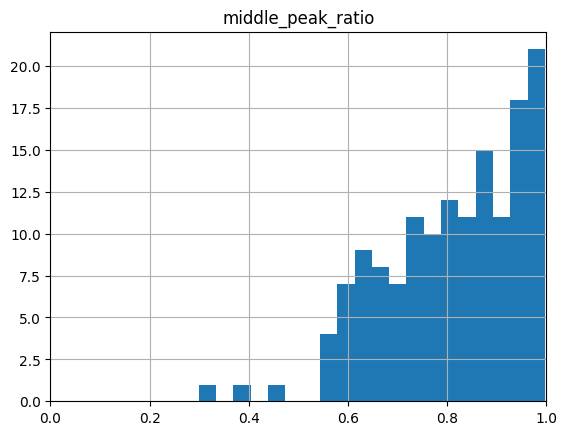

In [23]:
middle_peak_ratio_df.hist(bins=20)
plt.xlim(0, 1)

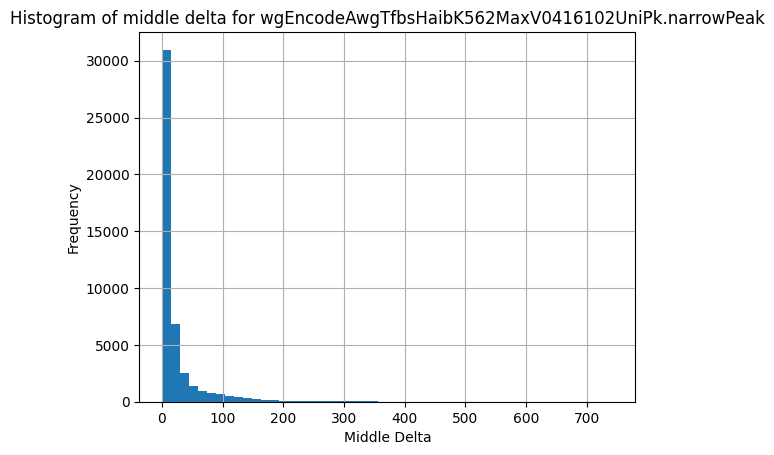

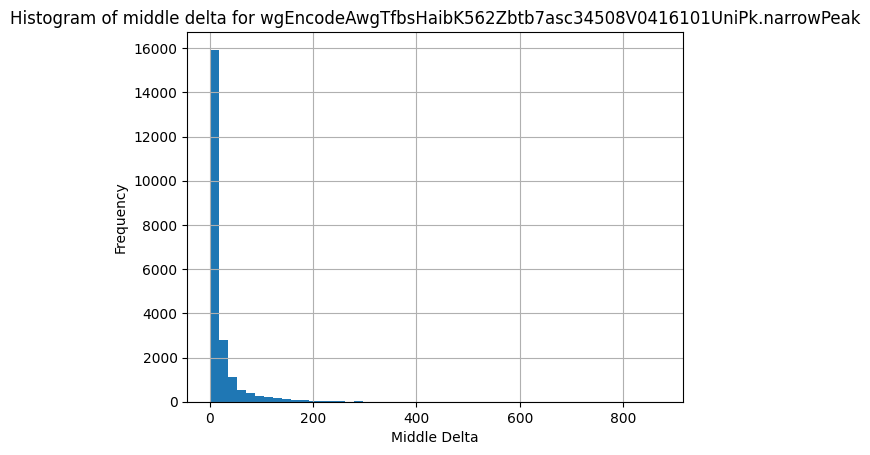

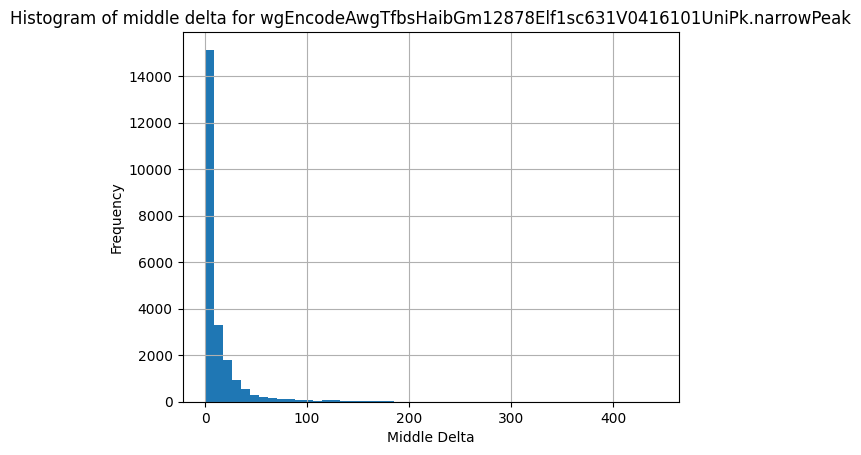

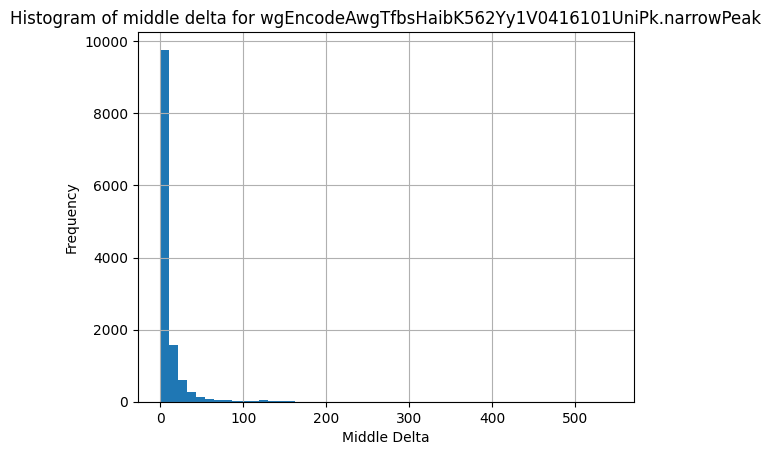

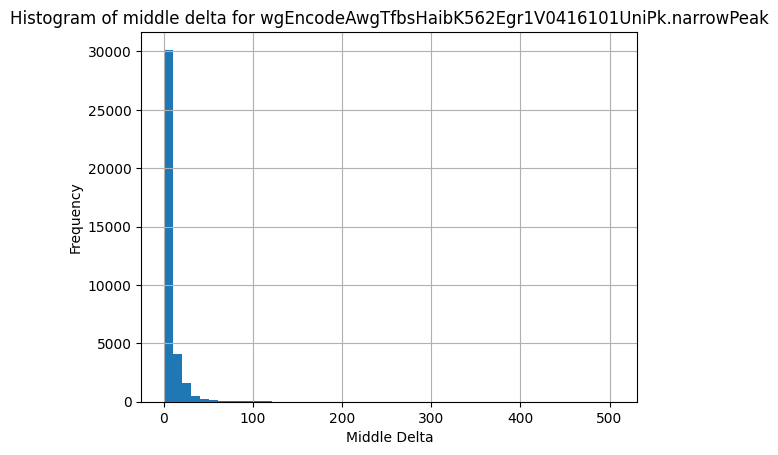

In [24]:
# Get the 5 datasets with the lowest "middle peak ratio"
lowest_middle_peak_ratio_datasets = middle_peak_ratio_df.nsmallest(5, 'middle_peak_ratio')

# Iterate through each dataset and plot the histogram of the "middle delta"
for index in lowest_middle_peak_ratio_datasets.index:
    row = df_filtered.iloc[index]
    file_name = row['filename'][:-3]
    file_path = os.path.join(data_folder, file_name)
    
    # Read the peaks data
    peaks = pd.read_csv(file_path, sep='\t', header=None)
    peaks.columns = ['chr', 'start', 'end', 'name', 'score', 'strand', "signalValue", "pValue", "qValue", "peak"]
    
    # Calculate the middle of the peak relative to the start position
    peaks["middle"] = (peaks["end"] - peaks["start"]) // 2
    peaks["middle delta"] = np.abs((peaks["middle"] - peaks["peak"]))
    
    # Plot the histogram of the "middle delta"
    plt.figure()
    peaks["middle delta"].hist(bins=50)
    plt.title(f"Histogram of middle delta for {file_name}")
    plt.xlabel("Middle Delta")
    plt.ylabel("Frequency")
    plt.show()

In [25]:
sum(peaks["middle delta"]==0)/peaks.shape[0]

0.5553009059534081

In [26]:
ATAC_path = "/data/home/natant/Negatives/Data/maxATAC/ATAC_Peaks_hg38/GM12878_ext40_peaks.narrowPeak"

In [27]:
# Define the path to the ATACseq data file
ATAC_path = "/data/home/natant/Negatives/Data/maxATAC/ATAC_Peaks_hg38/GM12878_ext40_peaks.narrowPeak"

# Load the ATACseq data into a dataframe
atac_df = pd.read_csv(ATAC_path, sep='\t', header=None)

# Assign appropriate column names
atac_df.columns = ['chr', 'start', 'end', 'name', 'score', 'strand', 'signalValue', 'pValue', 'qValue', 'peak']

# Display the dataframe
atac_df
# Add the "delta" column
atac_df["delta"] = atac_df["end"] - atac_df["start"]

# Display the dataframe
atac_df

,chr,start,end,name,score,strand,signalValue,pValue,qValue,peak,delta
0,chr1,10045,10159,/data/miraldiNB/Tareian/scratch/20210803_v1_AT...,75,.,4.86808,9.48428,7.52358,75,114
1,chr1,10361,10457,/data/miraldiNB/Tareian/scratch/20210803_v1_AT...,25,.,3.07458,4.27957,2.50207,65,96
2,chr1,29297,29337,/data/miraldiNB/Tareian/scratch/20210803_v1_AT...,59,.,4.35565,7.86791,5.95084,14,40
3,chr1,180872,180937,/data/miraldiNB/Tareian/scratch/20210803_v1_AT...,25,.,3.07458,4.27957,2.50207,33,65
4,chr1,181409,181542,/data/miraldiNB/Tareian/scratch/20210803_v1_AT...,127,.,6.40537,14.82914,12.75899,67,133
...,...,...,...,...,...,...,...,...,...,...,...
366595,chr9,138101128,138101205,/data/miraldiNB/Tareian/scratch/20210803_v1_AT...,59,.,4.35565,7.86791,5.95084,51,77
366596,chr9,138126044,138126092,/data/miraldiNB/Tareian/scratch/20210803_v1_AT...,75,.,4.86808,9.48428,7.52358,29,48
366597,chr9,138126189,138126413,/data/miraldiNB/Tareian/scratch/20210803_v1_AT...,1178,.,26.90255,120.68411,117.87688,128,224
366598,chr9,138132263,138132357,/data/miraldiNB/Tareian/scratch/20210803_v1_AT...,75,.,4.86808,9.48428,7.52358,55,94


In [28]:
df_filtered[df_filtered['cell'] == 'GM12878']['antibody'].unique()


array(['CTCF', 'ATF2_(SC-81188)', 'ATF3', 'CEBPB_(SC-150)', 'Egr-1',
       'ELF1_(SC-631)', 'ETS1', 'FOXM1_(SC-502)', 'MEF2A',
       'NFIC_(SC-81335)', 'Pbx3', 'RXRA', 'SIX5', 'SP1', 'SRF',
       'STAT5A_(SC-74442)', 'TCF12', 'USF-1', 'YY1_(SC-281)', 'ZBTB33',
       'ZEB1_(SC-25388)', 'ELK1_(1277-1)', 'IKZF1_(IkN)_(UCLA)', 'JunD',
       'Max', 'MAZ_(ab85725)', 'Mxi1_(AF4185)', 'NF-YA', 'Nrf1',
       'RFX5_(200-401-194)', 'TBP', 'USF2', 'Znf143_(16618-1-AP)',
       'ZNF274', 'ZZZ3'], dtype=object)

In [29]:
# Filter the dataframe for cell type GM12878 and TF ETS1
filtered_row = df_filtered[(df_filtered['cell'] == 'GM12878') & (df_filtered['antibody'] == 'ETS1')]

# Check if the filtered dataframe is not empty
if not filtered_row.empty:
    # Get the filename
    file_name = filtered_row.iloc[0]['filename']
    file_path = os.path.join(data_folder, file_name[:-3])  # Remove the .gz extension

    # Read the peaks data
    ChIP_df = pd.read_csv(file_path, sep='\t', header=None)
    ChIP_df.columns = ['chr', 'start', 'end', 'name', 'score', 'strand', "signalValue", "pValue", "qValue", "peak"]
    
    # Display the dataframe
    print(ChIP_df)
else:
    print("No data found for cell type GM12878 and TF ETS1")

        chr      start        end name  score strand  signalValue  pValue  \
0     chr17   39461214   39461530    .   1000      .   228.466393      -1   
1     chr12  122752676  122752910    .   1000      .   211.453562      -1   
2      chr9  120842862  120843139    .   1000      .   209.296174      -1   
3      chr1   45521810   45522026    .   1000      .   197.297394      -1   
4     chr17   76557600   76557820    .   1000      .   197.025578      -1   
...     ...        ...        ...  ...    ...    ...          ...     ...   
4136   chr1   26111603   26111827    .     92      .    14.513551      -1   
4137  chr20   53753038   53753262    .     92      .    14.510227      -1   
4138   chr1   27726025   27726249    .     92      .    14.507013      -1   
4139  chr15   50686664   50686888    .     92      .    14.506216      -1   
4140  chr19   49929065   49929289    .     92      .    14.505384      -1   

        qValue  peak  
0     3.900312   145  
1     3.900312   122  
2     

In [30]:
import pybedtools

# Convert the dataframes to BedTool objects
chip_bed = pybedtools.BedTool.from_dataframe(ChIP_df[['chr', 'start', 'end']])
atac_bed = pybedtools.BedTool.from_dataframe(atac_df[['chr', 'start', 'end']])

# Find the intersections (overlaps) between the two BedTool objects
overlap = chip_bed.intersect(atac_bed, u=True)

# Count the number of overlapping peaks
num_overlapping_peaks = len(overlap)

print(f"Number of overlapping peaks: {num_overlapping_peaks}")

# Find the non-overlapping peaks in the ChIP file
non_overlap_chip = chip_bed.subtract(atac_bed, A=True)
num_non_overlapping_chip_peaks = len(non_overlap_chip)

# Find the non-overlapping peaks in the ATAC file
non_overlap_atac = atac_bed.subtract(chip_bed, A=True)
num_non_overlapping_atac_peaks = len(non_overlap_atac)

print(f"Number of non-overlapping peaks in ChIP file: {num_non_overlapping_chip_peaks}")
print(f"Number of non-overlapping peaks in ATAC file: {num_non_overlapping_atac_peaks}")

Number of overlapping peaks: 3904
Number of non-overlapping peaks in ChIP file: 237
Number of non-overlapping peaks in ATAC file: 362641


In [55]:
# WTF this barely overlaps????

In [40]:
import pybedtools

# Filter the dataframe for cell type GM12878
filtered_rows = df_filtered[df_filtered['cell'] == 'GM12878']

# Initialize lists to store the results
overlap_counts = []
non_overlap_chip_counts = []
non_overlap_atac_counts = []

# Iterate through each row in the filtered dataframe
for index, row in filtered_rows.iterrows():
    file_name = row['filename'][:-3]
    file_path = os.path.join(data_folder, file_name)
    
    # Read the ChIP peaks data
    chip_peaks = pd.read_csv(file_path, sep='\t', header=None)
    chip_peaks.columns = ['chr', 'start', 'end', 'name', 'score', 'strand', "signalValue", "pValue", "qValue", "peak"]
    
    # Convert the ChIP peaks dataframe to a BedTool object
    chip_bed = pybedtools.BedTool.from_dataframe(chip_peaks[['chr', 'start', 'end']])
    
    # Find the intersections (overlaps) between the ChIP and ATAC BedTool objects
    overlap = chip_bed.intersect(atac_bed, u=True)
    
    # Count the number of overlapping peaks
    num_overlapping_peaks = len(overlap)
    overlap_counts.append(num_overlapping_peaks)
    
    # Find the non-overlapping peaks in the ChIP file
    non_overlap_chip = chip_bed.subtract(atac_bed, A=True)
    num_non_overlapping_chip_peaks = len(non_overlap_chip)
    non_overlap_chip_counts.append(num_non_overlapping_chip_peaks)
    
    # Find the non-overlapping peaks in the ATAC file
    non_overlap_atac = atac_bed.subtract(chip_bed, A=True)
    num_non_overlapping_atac_peaks = len(non_overlap_atac)
    non_overlap_atac_counts.append(num_non_overlapping_atac_peaks)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'filename': filtered_rows['filename'],
    'num_overlapping_peaks': overlap_counts,
    'num_non_overlapping_chip_peaks': non_overlap_chip_counts,
    'num_non_overlapping_atac_peaks': non_overlap_atac_counts
})


In [41]:
# Merge results_df with df_filtered to add the TF name
results_df = results_df.merge(df_filtered[['filename', 'antibody']], on='filename', how='left')

# Rename the 'antibody' column to 'tf_name'
results_df.rename(columns={'antibody': 'tf_name'}, inplace=True)
results_df["non-overlapping ChIP ratio"] = results_df["num_non_overlapping_chip_peaks"] / (results_df["num_non_overlapping_chip_peaks"] + results_df["num_overlapping_peaks"])
results_df["non-overlapping ATAC ratio"] = results_df["num_non_overlapping_atac_peaks"] / (results_df["num_non_overlapping_atac_peaks"] + results_df["num_overlapping_peaks"])

# Display the updated DataFrame
results_df

,filename,num_overlapping_peaks,num_non_overlapping_chip_peaks,num_non_overlapping_atac_peaks,tf_name,non-overlapping ChIP ratio,non-overlapping ATAC ratio
0,wgEncodeAwgTfbsBroadGm12878CtcfUniPk.narrowPea...,39548,5630,323261,CTCF,0.124618,0.890995
1,wgEncodeAwgTfbsHaibGm12878Atf2sc81188V0422111U...,22653,904,337773,ATF2_(SC-81188),0.038375,0.937149
2,wgEncodeAwgTfbsHaibGm12878Atf3Pcr1xUniPk.narro...,1435,244,365163,ATF3,0.145325,0.996086
3,wgEncodeAwgTfbsHaibGm12878Cebpbsc150V0422111Un...,5667,154,358902,CEBPB_(SC-150),0.026456,0.984456
4,wgEncodeAwgTfbsHaibGm12878Egr1Pcr2xUniPk.narro...,15285,1084,351485,Egr-1,0.066223,0.958325
5,wgEncodeAwgTfbsHaibGm12878Elf1sc631V0416101Uni...,21883,1223,342975,ELF1_(SC-631),0.052930,0.940023
6,wgEncodeAwgTfbsHaibGm12878Ets1Pcr1xUniPk.narro...,3904,237,362641,ETS1,0.057233,0.989349
7,wgEncodeAwgTfbsHaibGm12878Foxm1sc502V0422111Un...,22258,771,335564,FOXM1_(SC-502),0.033480,0.937796
8,wgEncodeAwgTfbsHaibGm12878Mef2aPcr1xUniPk.narr...,16624,1008,349286,MEF2A,0.057169,0.954568
9,wgEncodeAwgTfbsHaibGm12878Nficsc81335V0422111U...,27646,1513,331541,NFIC_(SC-81335),0.051888,0.923032


In [33]:
alternative_atac_path = "/data/home/natant/plmBind/Data/LINKED_DATASET/maxATAC/ATAC_Signal_File/Processed/GM12878_RP20M_minmax_percentile99.bed"

In [42]:
# Define the path to the alternative ATAC-seq data file
alternative_atac_path = "/data/home/natant/plmBind/Data/LINKED_DATASET/maxATAC/ATAC_Signal_File/Processed/GM12878_RP20M_minmax_percentile99.bed"

# Load the alternative ATAC-seq data into a dataframe
alternative_atac_df = pd.read_csv(alternative_atac_path, sep='\t', header=None, skiprows=1)

# Assign appropriate column names
alternative_atac_df.columns = ['chr', 'start', 'end', 'name', 'score', 'strand', 'signalValue', 'pValue', 'qValue', 'peak']

# Convert the alternative ATAC-seq dataframe to a BedTool object
alternative_atac_bed = pybedtools.BedTool.from_dataframe(alternative_atac_df[['chr', 'start', 'end']])

# Initialize lists to store the results
alternative_overlap_counts = []
alternative_non_overlap_chip_counts = []
alternative_non_overlap_atac_counts = []

# Iterate through each row in the filtered dataframe
for index, row in filtered_rows.iterrows():
    file_name = row['filename'][:-3]
    file_path = os.path.join(data_folder, file_name)
    
    # Read the ChIP peaks data
    chip_peaks = pd.read_csv(file_path, sep='\t', header=None)
    chip_peaks.columns = ['chr', 'start', 'end', 'name', 'score', 'strand', "signalValue", "pValue", "qValue", "peak"]
    
    # Convert the ChIP peaks dataframe to a BedTool object
    chip_bed = pybedtools.BedTool.from_dataframe(chip_peaks[['chr', 'start', 'end']])
    
    # Find the intersections (overlaps) between the ChIP and alternative ATAC BedTool objects
    alternative_overlap = chip_bed.intersect(alternative_atac_bed, u=True)
    
    # Count the number of overlapping peaks
    num_alternative_overlapping_peaks = len(alternative_overlap)
    alternative_overlap_counts.append(num_alternative_overlapping_peaks)
    
    # Find the non-overlapping peaks in the ChIP file
    alternative_non_overlap_chip = chip_bed.subtract(alternative_atac_bed, A=True)
    num_alternative_non_overlapping_chip_peaks = len(alternative_non_overlap_chip)
    alternative_non_overlap_chip_counts.append(num_alternative_non_overlapping_chip_peaks)
    
    # Find the non-overlapping peaks in the alternative ATAC file
    alternative_non_overlap_atac = alternative_atac_bed.subtract(chip_bed, A=True)
    num_alternative_non_overlapping_atac_peaks = len(alternative_non_overlap_atac)
    alternative_non_overlap_atac_counts.append(num_alternative_non_overlapping_atac_peaks)

# Create a DataFrame to store the results
alternative_results_df = pd.DataFrame({
    'filename': filtered_rows['filename'],
    'num_alternative_overlapping_peaks': alternative_overlap_counts,
    'num_alternative_non_overlapping_chip_peaks': alternative_non_overlap_chip_counts,
    'num_alternative_non_overlapping_atac_peaks': alternative_non_overlap_atac_counts
})

# Merge alternative_results_df with df_filtered to add the TF name
alternative_results_df = alternative_results_df.merge(df_filtered[['filename', 'antibody']], on='filename', how='left')

# Rename the 'antibody' column to 'tf_name'
alternative_results_df.rename(columns={'antibody': 'tf_name'}, inplace=True)


In [44]:
# Merge results_df with df_filtered to add the TF name
alternative_results_df = alternative_results_df.merge(df_filtered[['filename', 'antibody']], on='filename', how='left')

# Rename the 'antibody' column to 'tf_name'
alternative_results_df.rename(columns={'antibody': 'tf_name'}, inplace=True)
alternative_results_df["non-overlapping ChIP ratio"] = alternative_results_df["num_alternative_non_overlapping_chip_peaks"] / (alternative_results_df["num_alternative_non_overlapping_chip_peaks"] + alternative_results_df["num_alternative_overlapping_peaks"])
alternative_results_df["non-overlapping ATAC ratio"] = alternative_results_df["num_alternative_non_overlapping_atac_peaks"] / (alternative_results_df["num_alternative_non_overlapping_atac_peaks"] + alternative_results_df["num_alternative_overlapping_peaks"])

# Display the updated DataFrame
alternative_results_df

,filename,num_alternative_overlapping_peaks,num_alternative_non_overlapping_chip_peaks,num_alternative_non_overlapping_atac_peaks,tf_name,tf_name,tf_name,non-overlapping ChIP ratio,non-overlapping ATAC ratio
0,wgEncodeAwgTfbsBroadGm12878CtcfUniPk.narrowPea...,5075,40103,20719,CTCF,CTCF,CTCF,0.887667,0.803249
1,wgEncodeAwgTfbsHaibGm12878Atf2sc81188V0422111U...,11630,11927,14476,ATF2_(SC-81188),ATF2_(SC-81188),ATF2_(SC-81188),0.506304,0.554509
2,wgEncodeAwgTfbsHaibGm12878Atf3Pcr1xUniPk.narro...,1017,662,24794,ATF3,ATF3,ATF3,0.394282,0.960598
3,wgEncodeAwgTfbsHaibGm12878Cebpbsc150V0422111Un...,3892,1929,21816,CEBPB_(SC-150),CEBPB_(SC-150),CEBPB_(SC-150),0.331386,0.848607
4,wgEncodeAwgTfbsHaibGm12878Egr1Pcr2xUniPk.narro...,9787,6582,16357,Egr-1,Egr-1,Egr-1,0.402102,0.625650
5,wgEncodeAwgTfbsHaibGm12878Elf1sc631V0416101Uni...,13728,9378,12649,ELF1_(SC-631),ELF1_(SC-631),ELF1_(SC-631),0.405869,0.479547
6,wgEncodeAwgTfbsHaibGm12878Ets1Pcr1xUniPk.narro...,3270,871,22554,ETS1,ETS1,ETS1,0.210336,0.873374
7,wgEncodeAwgTfbsHaibGm12878Foxm1sc502V0422111Un...,11653,11376,14363,FOXM1_(SC-502),FOXM1_(SC-502),FOXM1_(SC-502),0.493986,0.552083
8,wgEncodeAwgTfbsHaibGm12878Mef2aPcr1xUniPk.narr...,7803,9829,18022,MEF2A,MEF2A,MEF2A,0.557452,0.697851
9,wgEncodeAwgTfbsHaibGm12878Nficsc81335V0422111U...,12341,16818,14570,NFIC_(SC-81335),NFIC_(SC-81335),NFIC_(SC-81335),0.576769,0.541414


In [45]:
# Define the path to the alternative ATAC-seq data file
alternative_atac_path = "/data/home/natant/plmBind/Data/LINKED_DATASET/maxATAC/ATAC_Signal_File/Processed_C_0_5/GM12878_RP20M_minmax_percentile99.bed"

# Load the alternative ATAC-seq data into a dataframe
alternative_atac_df = pd.read_csv(alternative_atac_path, sep='\t', header=None, skiprows=1)

# Assign appropriate column names
alternative_atac_df.columns = ['chr', 'start', 'end', 'name', 'score', 'strand', 'signalValue', 'pValue', 'qValue', 'peak']

# Convert the alternative ATAC-seq dataframe to a BedTool object
alternative_atac_bed = pybedtools.BedTool.from_dataframe(alternative_atac_df[['chr', 'start', 'end']])

# Initialize lists to store the results
alternative_overlap_counts = []
alternative_non_overlap_chip_counts = []
alternative_non_overlap_atac_counts = []

# Iterate through each row in the filtered dataframe
for index, row in filtered_rows.iterrows():
    file_name = row['filename'][:-3]
    file_path = os.path.join(data_folder, file_name)
    
    # Read the ChIP peaks data
    chip_peaks = pd.read_csv(file_path, sep='\t', header=None)
    chip_peaks.columns = ['chr', 'start', 'end', 'name', 'score', 'strand', "signalValue", "pValue", "qValue", "peak"]
    
    # Convert the ChIP peaks dataframe to a BedTool object
    chip_bed = pybedtools.BedTool.from_dataframe(chip_peaks[['chr', 'start', 'end']])
    
    # Find the intersections (overlaps) between the ChIP and alternative ATAC BedTool objects
    alternative_overlap = chip_bed.intersect(alternative_atac_bed, u=True)
    
    # Count the number of overlapping peaks
    num_alternative_overlapping_peaks = len(alternative_overlap)
    alternative_overlap_counts.append(num_alternative_overlapping_peaks)
    
    # Find the non-overlapping peaks in the ChIP file
    alternative_non_overlap_chip = chip_bed.subtract(alternative_atac_bed, A=True)
    num_alternative_non_overlapping_chip_peaks = len(alternative_non_overlap_chip)
    alternative_non_overlap_chip_counts.append(num_alternative_non_overlapping_chip_peaks)
    
    # Find the non-overlapping peaks in the alternative ATAC file
    alternative_non_overlap_atac = alternative_atac_bed.subtract(chip_bed, A=True)
    num_alternative_non_overlapping_atac_peaks = len(alternative_non_overlap_atac)
    alternative_non_overlap_atac_counts.append(num_alternative_non_overlapping_atac_peaks)

# Create a DataFrame to store the results
alternative_results_df = pd.DataFrame({
    'filename': filtered_rows['filename'],
    'num_alternative_overlapping_peaks': alternative_overlap_counts,
    'num_alternative_non_overlapping_chip_peaks': alternative_non_overlap_chip_counts,
    'num_alternative_non_overlapping_atac_peaks': alternative_non_overlap_atac_counts
})

# Merge alternative_results_df with df_filtered to add the TF name
alternative_results_df = alternative_results_df.merge(df_filtered[['filename', 'antibody']], on='filename', how='left')

# Rename the 'antibody' column to 'tf_name'
alternative_results_df.rename(columns={'antibody': 'tf_name'}, inplace=True)


In [46]:
# Merge results_df with df_filtered to add the TF name
alternative_results_df = alternative_results_df.merge(df_filtered[['filename', 'antibody']], on='filename', how='left')

# Rename the 'antibody' column to 'tf_name'
alternative_results_df.rename(columns={'antibody': 'tf_name'}, inplace=True)
alternative_results_df["non-overlapping ChIP ratio"] = alternative_results_df["num_alternative_non_overlapping_chip_peaks"] / (alternative_results_df["num_alternative_non_overlapping_chip_peaks"] + alternative_results_df["num_alternative_overlapping_peaks"])
alternative_results_df["non-overlapping ATAC ratio"] = alternative_results_df["num_alternative_non_overlapping_atac_peaks"] / (alternative_results_df["num_alternative_non_overlapping_atac_peaks"] + alternative_results_df["num_alternative_overlapping_peaks"])

# Display the updated DataFrame
alternative_results_df

,filename,num_alternative_overlapping_peaks,num_alternative_non_overlapping_chip_peaks,num_alternative_non_overlapping_atac_peaks,tf_name,tf_name,non-overlapping ChIP ratio,non-overlapping ATAC ratio
0,wgEncodeAwgTfbsBroadGm12878CtcfUniPk.narrowPea...,8725,36453,39149,CTCF,CTCF,0.806875,0.817751
1,wgEncodeAwgTfbsHaibGm12878Atf2sc81188V0422111U...,17086,6471,30835,ATF2_(SC-81188),ATF2_(SC-81188),0.274695,0.643455
2,wgEncodeAwgTfbsHaibGm12878Atf3Pcr1xUniPk.narro...,1215,464,46690,ATF3,ATF3,0.276355,0.974637
3,wgEncodeAwgTfbsHaibGm12878Cebpbsc150V0422111Un...,5045,776,42538,CEBPB_(SC-150),CEBPB_(SC-150),0.133310,0.893975
4,wgEncodeAwgTfbsHaibGm12878Egr1Pcr2xUniPk.narro...,12628,3741,36136,Egr-1,Egr-1,0.228542,0.741038
5,wgEncodeAwgTfbsHaibGm12878Elf1sc631V0416101Uni...,17752,5354,31121,ELF1_(SC-631),ELF1_(SC-631),0.231715,0.636773
6,wgEncodeAwgTfbsHaibGm12878Ets1Pcr1xUniPk.narro...,3637,504,44301,ETS1,ETS1,0.121710,0.924131
7,wgEncodeAwgTfbsHaibGm12878Foxm1sc502V0422111Un...,16623,6406,31138,FOXM1_(SC-502),FOXM1_(SC-502),0.278171,0.651955
8,wgEncodeAwgTfbsHaibGm12878Mef2aPcr1xUniPk.narr...,11398,6234,36567,MEF2A,MEF2A,0.353562,0.762368
9,wgEncodeAwgTfbsHaibGm12878Nficsc81335V0422111U...,19073,10086,29871,NFIC_(SC-81335),NFIC_(SC-81335),0.345897,0.610310


In [47]:
# Define the path to the alternative ATAC-seq data file
alternative_atac_path = "/data/home/natant/plmBind/Data/LINKED_DATASET/maxATAC/ATAC_Signal_File/Processed_C_5/GM12878_RP20M_minmax_percentile99.bed"

# Load the alternative ATAC-seq data into a dataframe
alternative_atac_df = pd.read_csv(alternative_atac_path, sep='\t', header=None, skiprows=1)

# Assign appropriate column names
alternative_atac_df.columns = ['chr', 'start', 'end', 'name', 'score', 'strand', 'signalValue', 'pValue', 'qValue', 'peak']

# Convert the alternative ATAC-seq dataframe to a BedTool object
alternative_atac_bed = pybedtools.BedTool.from_dataframe(alternative_atac_df[['chr', 'start', 'end']])

# Initialize lists to store the results
alternative_overlap_counts = []
alternative_non_overlap_chip_counts = []
alternative_non_overlap_atac_counts = []

# Iterate through each row in the filtered dataframe
for index, row in filtered_rows.iterrows():
    file_name = row['filename'][:-3]
    file_path = os.path.join(data_folder, file_name)
    
    # Read the ChIP peaks data
    chip_peaks = pd.read_csv(file_path, sep='\t', header=None)
    chip_peaks.columns = ['chr', 'start', 'end', 'name', 'score', 'strand', "signalValue", "pValue", "qValue", "peak"]
    
    # Convert the ChIP peaks dataframe to a BedTool object
    chip_bed = pybedtools.BedTool.from_dataframe(chip_peaks[['chr', 'start', 'end']])
    
    # Find the intersections (overlaps) between the ChIP and alternative ATAC BedTool objects
    alternative_overlap = chip_bed.intersect(alternative_atac_bed, u=True)
    
    # Count the number of overlapping peaks
    num_alternative_overlapping_peaks = len(alternative_overlap)
    alternative_overlap_counts.append(num_alternative_overlapping_peaks)
    
    # Find the non-overlapping peaks in the ChIP file
    alternative_non_overlap_chip = chip_bed.subtract(alternative_atac_bed, A=True)
    num_alternative_non_overlapping_chip_peaks = len(alternative_non_overlap_chip)
    alternative_non_overlap_chip_counts.append(num_alternative_non_overlapping_chip_peaks)
    
    # Find the non-overlapping peaks in the alternative ATAC file
    alternative_non_overlap_atac = alternative_atac_bed.subtract(chip_bed, A=True)
    num_alternative_non_overlapping_atac_peaks = len(alternative_non_overlap_atac)
    alternative_non_overlap_atac_counts.append(num_alternative_non_overlapping_atac_peaks)

# Create a DataFrame to store the results
alternative_results_df = pd.DataFrame({
    'filename': filtered_rows['filename'],
    'num_alternative_overlapping_peaks': alternative_overlap_counts,
    'num_alternative_non_overlapping_chip_peaks': alternative_non_overlap_chip_counts,
    'num_alternative_non_overlapping_atac_peaks': alternative_non_overlap_atac_counts
})

# Merge alternative_results_df with df_filtered to add the TF name
alternative_results_df = alternative_results_df.merge(df_filtered[['filename', 'antibody']], on='filename', how='left')

# Rename the 'antibody' column to 'tf_name'
alternative_results_df.rename(columns={'antibody': 'tf_name'}, inplace=True)


In [48]:
# Merge results_df with df_filtered to add the TF name
alternative_results_df = alternative_results_df.merge(df_filtered[['filename', 'antibody']], on='filename', how='left')

# Rename the 'antibody' column to 'tf_name'
alternative_results_df.rename(columns={'antibody': 'tf_name'}, inplace=True)
alternative_results_df["non-overlapping ChIP ratio"] = alternative_results_df["num_alternative_non_overlapping_chip_peaks"] / (alternative_results_df["num_alternative_non_overlapping_chip_peaks"] + alternative_results_df["num_alternative_overlapping_peaks"])
alternative_results_df["non-overlapping ATAC ratio"] = alternative_results_df["num_alternative_non_overlapping_atac_peaks"] / (alternative_results_df["num_alternative_non_overlapping_atac_peaks"] + alternative_results_df["num_alternative_overlapping_peaks"])

# Display the updated DataFrame
alternative_results_df

,filename,num_alternative_overlapping_peaks,num_alternative_non_overlapping_chip_peaks,num_alternative_non_overlapping_atac_peaks,tf_name,tf_name,non-overlapping ChIP ratio,non-overlapping ATAC ratio
0,wgEncodeAwgTfbsBroadGm12878CtcfUniPk.narrowPea...,280,44898,989,CTCF,CTCF,0.993802,0.779354
1,wgEncodeAwgTfbsHaibGm12878Atf2sc81188V0422111U...,478,23079,829,ATF2_(SC-81188),ATF2_(SC-81188),0.979709,0.634277
2,wgEncodeAwgTfbsHaibGm12878Atf3Pcr1xUniPk.narro...,105,1574,1162,ATF3,ATF3,0.937463,0.917127
3,wgEncodeAwgTfbsHaibGm12878Cebpbsc150V0422111Un...,125,5696,1145,CEBPB_(SC-150),CEBPB_(SC-150),0.978526,0.901575
4,wgEncodeAwgTfbsHaibGm12878Egr1Pcr2xUniPk.narro...,794,15575,509,Egr-1,Egr-1,0.951494,0.390637
5,wgEncodeAwgTfbsHaibGm12878Elf1sc631V0416101Uni...,1223,21883,167,ELF1_(SC-631),ELF1_(SC-631),0.947070,0.120144
6,wgEncodeAwgTfbsHaibGm12878Ets1Pcr1xUniPk.narro...,346,3795,926,ETS1,ETS1,0.916445,0.727987
7,wgEncodeAwgTfbsHaibGm12878Foxm1sc502V0422111Un...,615,22414,719,FOXM1_(SC-502),FOXM1_(SC-502),0.973295,0.538981
8,wgEncodeAwgTfbsHaibGm12878Mef2aPcr1xUniPk.narr...,260,17372,1007,MEF2A,MEF2A,0.985254,0.794791
9,wgEncodeAwgTfbsHaibGm12878Nficsc81335V0422111U...,404,28755,906,NFIC_(SC-81335),NFIC_(SC-81335),0.986145,0.691603
